In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [45]:
df = pd.read_csv("../data/iiwase_log_1.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])

df1 = df[df["signal"]==" meas_jnt_vel[1]"]
df1.head()

,time,activity,stream,signal,value
13,2023-01-17 13:58:22.228,iiwa_controller,info,meas_jnt_vel[1],0.000000
36,2023-01-17 13:58:22.260,iiwa_controller,info,meas_jnt_vel[1],0.000000
59,2023-01-17 13:58:22.268,iiwa_controller,info,meas_jnt_vel[1],0.033360
82,2023-01-17 13:58:22.276,iiwa_controller,info,meas_jnt_vel[1],0.016133
105,2023-01-17 13:58:22.284,iiwa_controller,info,meas_jnt_vel[1],0.031617


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 13 to 17171
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      747 non-null    datetime64[ns]
 1   activity  747 non-null    object        
 2   stream    747 non-null    object        
 3   signal    747 non-null    object        
 4   value     747 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 35.0+ KB


In [22]:
df1 = df[df["signal"]==" meas_jnt_vel[1]"]

b, a = signal.butter(2, 5, 'low', fs = 1000/8)
filt_jnt_vel = signal.filtfilt(b, a, df1["value"])

lp_signal = df1["value"] - filt_jnt_vel

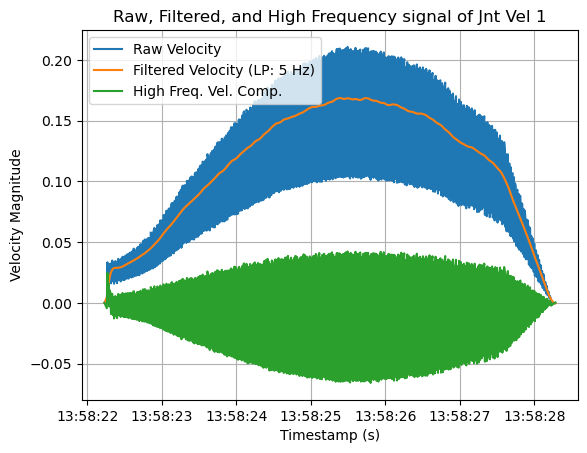

In [43]:
fig, ax = plt.subplots(1, 1)

ax.plot(df1["time"], df1["value"], label="Raw Velocity")
ax.plot(df1["time"], filt_jnt_vel, label="Filtered Velocity (LP: 5 Hz)")

ax.plot(df1["time"], lp_signal, label="High Freq. Vel. Comp.")

ax.legend()

ax.set(xlabel="Timestamp (s)", ylabel="Velocity Magnitude", title="Raw, Filtered, and High Frequency signal of Jnt Vel 1")
ax.grid(True)

fig.savefig("../docs/figs/jnt_vel_signal.svg", bbox_inches='tight')

/tmp/ipykernel_42629/3413187744.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.hist(lp_signal[300:500], bins=50)


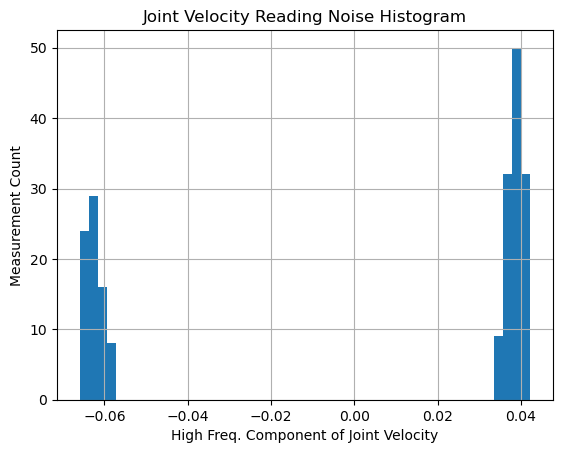

In [44]:
fig, ax = plt.subplots(1, 1)

ax.hist(lp_signal[300:500], bins=50)

ax.set(title="Joint Velocity Reading Noise Histogram")
ax.grid(True)

ax.set(xlabel="High Freq. Component of Joint Velocity", ylabel="Measurement Count")

fig.savefig("../docs/figs/vel_signal_hist.svg", bbox_inches='tight')